In [1]:
import matplotlib.pyplot as plt

import numpy as np

import healpy as hp
from healpy.newvisufunc import projview

import math

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits

import pandas as pd

from sklearn.cluster import KMeans

import seaborn as sns; sns.set()

## Visualisation of HEALPix map with healpy

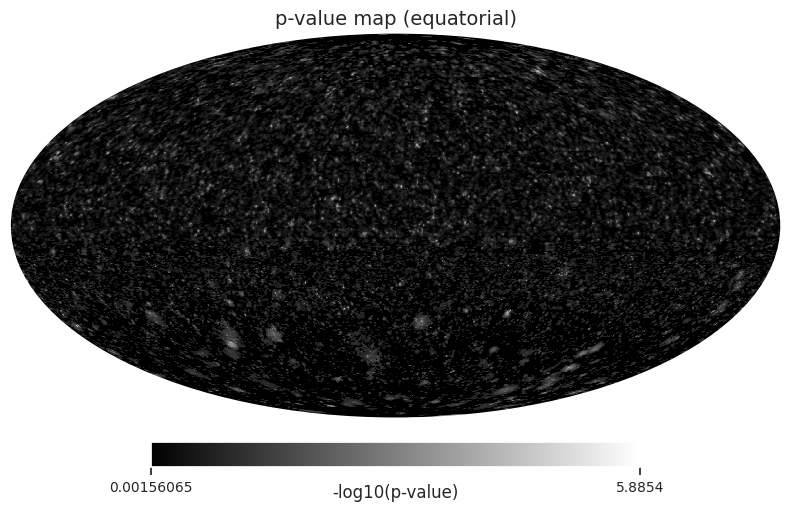

In [2]:
Lmap = hp.read_map("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/log10p_maps.fits")
projview(Lmap, coord=["E"], projection_type="mollweide", title="p-value map (equatorial)", graticule=True, cmap="gray", unit="-log10(p-value)")

## Converting pixels to eq. coordinates and weighing with p-values

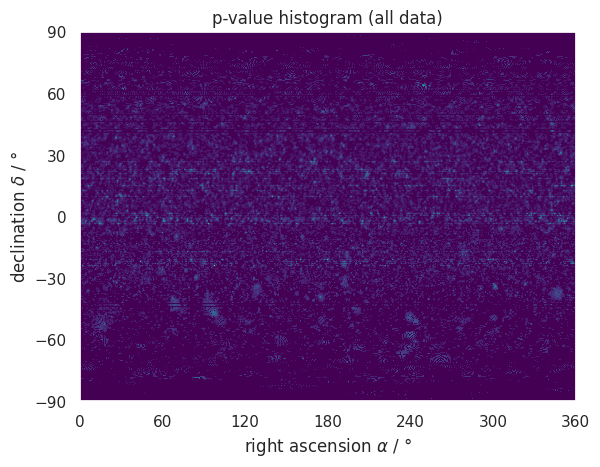

In [3]:
ra, dec = hp.pix2ang(nside=512, ipix=[i for i in range(3145728)], lonlat=True)
plt.hist2d(ra, dec, bins=[2048,2048], weights=Lmap, cmap="viridis")
plt.title("p-value histogram (all data)")
plt.xlabel(r"right ascension $\alpha$ / °")
plt.ylabel(r"declination $\delta$ / °")
plt.yticks([-90, -60, -30, 0, 30, 60, 90])
plt.xticks([0, 60, 120, 180, 240, 300, 359.93], ["0", "60", "120", "180", "240", "300", "360"])
plt.show()

## Having a look at the data with astropy

In [4]:
fit = fits.open("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/log10p_maps.fits")
data = fit[1].data.field(0)
print(f"The data of the fits file is stored in {data.shape[0]} rows and {data.shape[1]} columns representing pixels of the HEALPix pixelization scheme.")
print("The value of each individual entry is -log(p-value) of the corresponding pixel on the map.")
print(data)

The data of the fits file is stored in 3072 rows and 1024 columns representing pixels of the HEALPix pixelization scheme.
The value of each individual entry is -log(p-value) of the corresponding pixel on the map.
[[0.00573351 0.00573351 0.00573351 ... 1.2138127  1.2987899  1.33242   ]
 [1.3117348  1.2454113  0.00569461 ... 0.00565848 0.00565848 0.00565848]
 [0.00565848 0.00565848 0.01694473 ... 0.08086844 0.11392159 0.08565191]
 ...
 [0.00461378 0.00461378 0.00461378 ... 0.00462953 0.00462953 0.00462953]
 [0.00462953 0.00462953 0.00462953 ... 0.00464544 0.00464544 0.00464544]
 [0.00464544 0.00464544 0.00464544 ... 0.00466265 0.00466265 0.00466265]]


#  Cleaning data with pandas DataFrames

In [5]:
galactic_coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame="icrs").galactic
coord_list = list(zip(ra, dec, Lmap, galactic_coords.l.degree, galactic_coords.b.degree))
df = pd.DataFrame(coord_list, columns=["RA","DEC","-log[p-value]","l","b"])
df1 = df[(df["DEC"]<-5) & (df["DEC"]>-85)]
df2 = df1[df1["b"]>10]
df3 = df1[df1["b"]<-10]
df_clean = pd.concat([df2, df3], ignore_index=True)
df_clean

,RA,DEC,-log[p-value],l,b
0,116.894531,-5.004822,0.872798,223.928789,10.092225
1,117.070312,-5.004822,0.714189,224.014316,10.245774
2,117.246094,-5.004822,0.582985,224.099968,10.399277
3,117.421875,-5.004822,0.002598,224.185745,10.552735
4,117.597656,-5.004822,0.433180,224.271650,10.706147
...,...,...,...,...,...
1174657,352.636364,-84.972998,1.438126,304.975042,-31.830474
1174658,354.272727,-84.972998,1.344586,304.816794,-31.880389
1174659,355.909091,-84.972998,1.198637,304.656776,-31.926261
1174660,357.545455,-84.972998,1.048155,304.495135,-31.968046


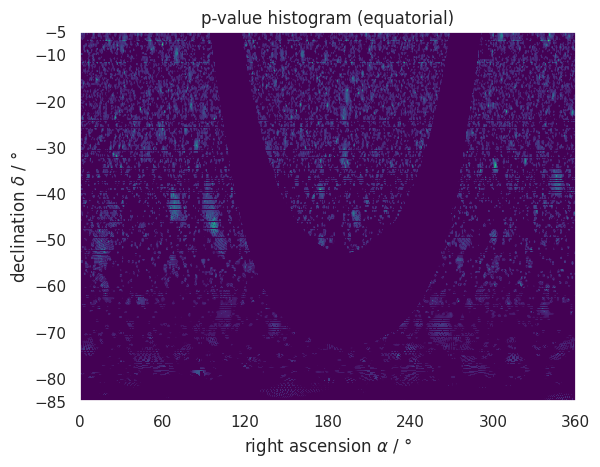

In [6]:
plt.hist2d(df_clean["RA"].values, df_clean["DEC"].values, bins=[1024,1024], weights=df_clean["-log[p-value]"], cmap="viridis")
plt.title("p-value histogram (equatorial)")
plt.xlabel(r"right ascension $\alpha$ / °")
plt.ylabel(r"declination $\delta$ / °")
plt.yticks([-85, -80, -70, -60, -50, -40, -30, -20, -10, -5])
plt.xticks([0, 60, 120, 180, 240, 300, 359.93], ["0", "60", "120", "180", "240", "300", "360"])
plt.show()

# Setting up neutrino spot samples (My method)

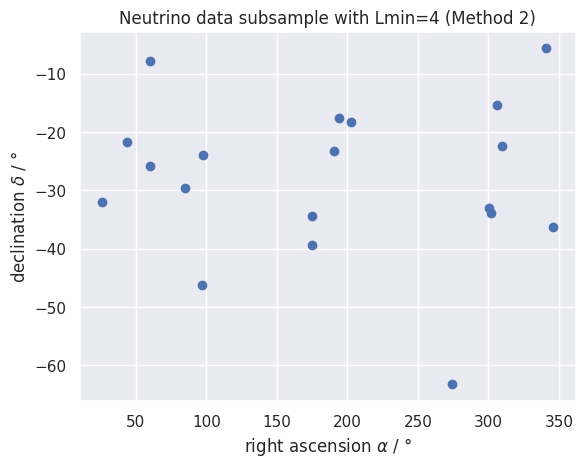

array([[ 44.11352298, -21.72049006,   4.63134069],
       [300.3730951 , -33.04457264,   4.64682862],
       [174.6128265 , -39.2858459 ,   5.17976619],
       [ 97.23641862, -46.26141284,   4.59572604],
       [340.75195312,  -5.67918985,   4.01201868],
       [202.32421875, -18.2885118 ,   4.04023361],
       [ 59.81014101,  -7.74724915,   5.0741676 ],
       [ 84.71712551, -29.63528251,   4.73318048],
       [274.5       , -63.26048812,   4.03021955],
       [346.02539062, -36.23836224,   4.02508259],
       [ 26.34115701, -31.92189105,   4.64380527],
       [309.38258786, -22.32468098,   4.49569647],
       [ 59.98052761, -25.89845972,   4.32450791],
       [194.07580974, -17.64919915,   4.35704964],
       [ 97.58643487, -23.86202524,   4.34810329],
       [306.11976097, -15.40120114,   4.43747317],
       [190.37109375, -23.23674253,   4.28769016],
       [175.16601562, -34.40952514,   4.08191299],
       [301.62717701, -33.86322409,   4.5466822 ]])

In [7]:
# Kmeans cluster algorithm to group coordinates based on the number of clusters
df4 = df_clean[df_clean["-log[p-value]"]>4].sort_values(by=["RA"]).reset_index()
kmeans = KMeans(19, n_init=300)  # use random_state=int parameter to make the randomness deterministic
kmeans.fit(df4[["RA", "DEC", "-log[p-value]"]].to_numpy(), sample_weight=[math.log(x, 1.0001)-13880 for x in df4[["RA", "DEC", "-log[p-value]"]].to_numpy()[:,2]])
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1])
plt.title("Neutrino data subsample with Lmin=4 (Method 2)")
plt.xlabel(r"right ascension $\alpha$ / °")
plt.ylabel(r"declination $\delta$ / °")
plt.show()
centers

In [8]:
#pd.DataFrame(centers).to_csv("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/neutrino_hotspots_40.csv")

## Sub sampling method (Busons method)

In [9]:
df4["cluster_label"] = kmeans.labels_

hotspots_index = []
cluster_point_list = []
for i in range(19):
    cluster_points = []
    for j in range(87):
        if i == df4["cluster_label"][j]:
            cluster_points.append([df4["-log[p-value]"][j], j])
    cluster_point_list.append(cluster_points)
    hotspots_index.append(max([[x,y] for [x,y] in cluster_point_list[i]]))

hotspots = []
for i in range(19):
    hotspots.append([df4.iloc[hotspots_index[i][1]][1], df4.iloc[hotspots_index[i][1]][2], df4.iloc[hotspots_index[i][1]][3]])
hotspots

[[44.12109374999999, -21.783087497887692, 4.87321662902832],
 [300.41015625, -33.24204293491425, 4.905032634735107],
 [174.638671875, -39.257929850984596, 5.885403156280518],
 [97.2269807280514, -46.27664738604423, 4.986952781677246],
 [340.75195312499994, -5.6791898455823855, 4.01201868057251],
 [202.32421875, -18.288511803019688, 4.040233612060547],
 [59.853515625, -7.782714385390946, 5.564757347106934],
 [84.7265625, -29.570200982081843, 4.9942522048950195],
 [274.5, -63.26048812198883, 4.030219554901123],
 [346.025390625, -36.23836223716917, 4.025082588195801],
 [26.279296874999996, -31.91400482422665, 4.936773777008057],
 [309.375, -22.265949711651743, 4.664159297943115],
 [59.94140624999999, -25.861543698470584, 4.356352806091309],
 [194.06249999999997, -17.66105304799825, 4.407330513000488],
 [97.55859375, -23.887863372809832, 4.419935703277588],
 [306.123046875, -15.40409369872549, 4.453568935394287],
 [190.37109375, -23.236742534068114, 4.287690162658691],
 [175.166015625, -34

In [10]:
#pd.DataFrame(hotspots).to_csv("/mnt/c/Users/joerg/OneDrive/Dokumente/UNI/Bachelor of Science/Bachelorarbeit/Jupyter Notebook/buson_neutrino_hotspots_40.csv")